In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()
        
        #encoder layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc21 = nn.Linear(hidden_size, latent_size)
        self.fc22 = nn.Linear(hidden_size, latent_size)
        #decoder layers
        self.fc3 = nn.Linear(latent_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, input_size)

    #input_size 784 --> latent size 20
    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    #this is needed to that the calculation is differentiable
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    #latent size 20 --> input size 784
    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Define loss function
def loss_function(recon_x, x, mu, logvar):
    #loss between original x and reconstructed x
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    #regularization purposes
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training function
def train(model, train_loader, optimizer, epoch, verbose=True):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % log_interval == 0 and verbose == True:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))
    if verbose:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(data)))
    return train_loss

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set hyperparameters
batch_size = 128
epochs = 10
lr = 1e-3
input_size = 784
hidden_size = 400
latent_size = 20
log_interval = 100

# Load data
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)

# Initialize model and optimizer
model = VAE(input_size, hidden_size, latent_size).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)


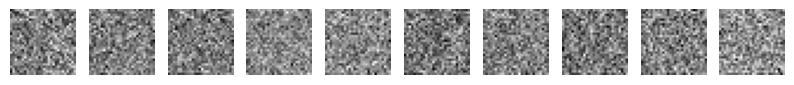

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate new images from random samples in the latent space
def generate_samples(model, num_samples):
    with torch.no_grad():
        z = torch.randn(num_samples, latent_size).to(device)
        generated_images = model.decode(z).cpu()
    return generated_images.view(-1, 28, 28)


def plot_ten_samples():
   # Generate 10 new images
    num_samples = 10
    generated_images = generate_samples(model, num_samples)

    # Plot the generated images
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

plot_ten_samples()

# Task b) - Training Process

Train Epoch: 1 [0/60000 (0%)]	Loss: 547.798401
Train Epoch: 1 [12800/60000 (21%)]	Loss: 301.211700
Train Epoch: 1 [25600/60000 (43%)]	Loss: 261.988342
Train Epoch: 1 [38400/60000 (64%)]	Loss: 270.501923
Train Epoch: 1 [51200/60000 (85%)]	Loss: 269.626923
Train Epoch: 1 [44928/60000 (100%)]	Loss: 245.398336


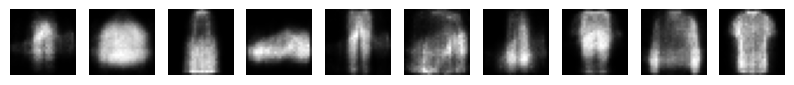

Train Epoch: 2 [0/60000 (0%)]	Loss: 266.598511
Train Epoch: 2 [12800/60000 (21%)]	Loss: 261.826965
Train Epoch: 2 [25600/60000 (43%)]	Loss: 249.449768
Train Epoch: 2 [38400/60000 (64%)]	Loss: 256.432404
Train Epoch: 2 [51200/60000 (85%)]	Loss: 247.542618
Train Epoch: 2 [44928/60000 (100%)]	Loss: 254.576518


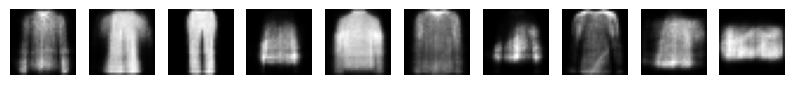

Train Epoch: 3 [0/60000 (0%)]	Loss: 251.131149
Train Epoch: 3 [12800/60000 (21%)]	Loss: 247.285477
Train Epoch: 3 [25600/60000 (43%)]	Loss: 260.309814
Train Epoch: 3 [38400/60000 (64%)]	Loss: 247.938934
Train Epoch: 3 [51200/60000 (85%)]	Loss: 246.207901
Train Epoch: 3 [44928/60000 (100%)]	Loss: 248.000814


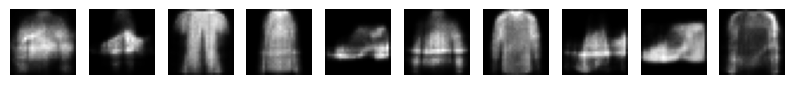

Train Epoch: 4 [0/60000 (0%)]	Loss: 240.591827
Train Epoch: 4 [12800/60000 (21%)]	Loss: 241.361084
Train Epoch: 4 [25600/60000 (43%)]	Loss: 240.864960
Train Epoch: 4 [38400/60000 (64%)]	Loss: 252.424088
Train Epoch: 4 [51200/60000 (85%)]	Loss: 239.445496
Train Epoch: 4 [44928/60000 (100%)]	Loss: 243.081238


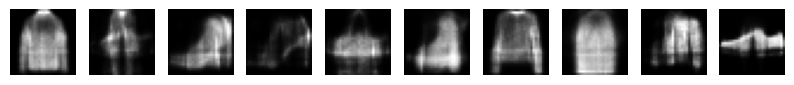

Train Epoch: 5 [0/60000 (0%)]	Loss: 257.989441
Train Epoch: 5 [12800/60000 (21%)]	Loss: 241.983017
Train Epoch: 5 [25600/60000 (43%)]	Loss: 251.464401
Train Epoch: 5 [38400/60000 (64%)]	Loss: 239.514496
Train Epoch: 5 [51200/60000 (85%)]	Loss: 230.992416
Train Epoch: 5 [44928/60000 (100%)]	Loss: 258.511678


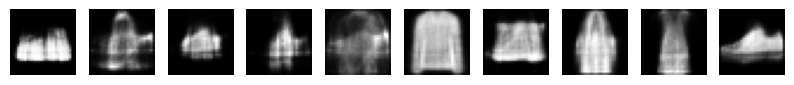

Train Epoch: 6 [0/60000 (0%)]	Loss: 251.927261
Train Epoch: 6 [12800/60000 (21%)]	Loss: 231.490128
Train Epoch: 6 [25600/60000 (43%)]	Loss: 245.964966
Train Epoch: 6 [38400/60000 (64%)]	Loss: 240.508545
Train Epoch: 6 [51200/60000 (85%)]	Loss: 240.451401
Train Epoch: 6 [44928/60000 (100%)]	Loss: 234.725749


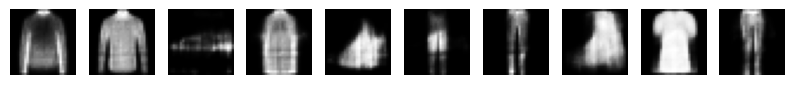

Train Epoch: 7 [0/60000 (0%)]	Loss: 245.934753
Train Epoch: 7 [12800/60000 (21%)]	Loss: 241.409012
Train Epoch: 7 [25600/60000 (43%)]	Loss: 252.062393
Train Epoch: 7 [38400/60000 (64%)]	Loss: 234.990906
Train Epoch: 7 [51200/60000 (85%)]	Loss: 246.044266
Train Epoch: 7 [44928/60000 (100%)]	Loss: 249.135783


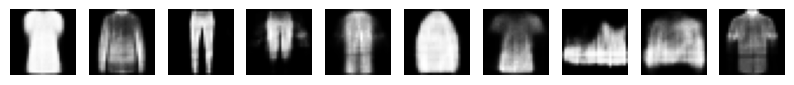

Train Epoch: 8 [0/60000 (0%)]	Loss: 244.910690
Train Epoch: 8 [12800/60000 (21%)]	Loss: 240.500916
Train Epoch: 8 [25600/60000 (43%)]	Loss: 233.291550
Train Epoch: 8 [38400/60000 (64%)]	Loss: 236.249100
Train Epoch: 8 [51200/60000 (85%)]	Loss: 241.286377
Train Epoch: 8 [44928/60000 (100%)]	Loss: 242.117411


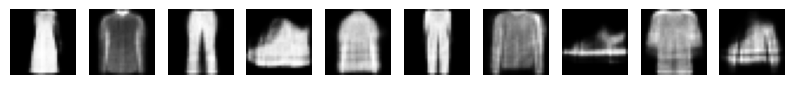

Train Epoch: 9 [0/60000 (0%)]	Loss: 249.760468
Train Epoch: 9 [12800/60000 (21%)]	Loss: 244.121002
Train Epoch: 9 [25600/60000 (43%)]	Loss: 234.001419
Train Epoch: 9 [38400/60000 (64%)]	Loss: 248.374023
Train Epoch: 9 [51200/60000 (85%)]	Loss: 245.537827
Train Epoch: 9 [44928/60000 (100%)]	Loss: 254.574280


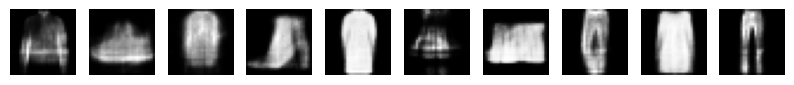

Train Epoch: 10 [0/60000 (0%)]	Loss: 242.937088
Train Epoch: 10 [12800/60000 (21%)]	Loss: 251.238998
Train Epoch: 10 [25600/60000 (43%)]	Loss: 250.311462
Train Epoch: 10 [38400/60000 (64%)]	Loss: 220.435806
Train Epoch: 10 [51200/60000 (85%)]	Loss: 242.876633
Train Epoch: 10 [44928/60000 (100%)]	Loss: 249.839315


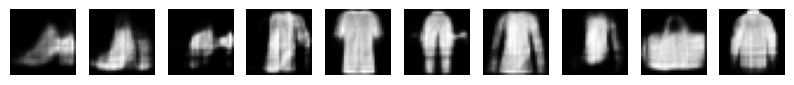

In [24]:
# Train the model
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch)
    plot_ten_samples()

# Task c) - Visualize the latent space

This does not seem really usefull - because we reduce the dimensionality too much from 784 to 2?

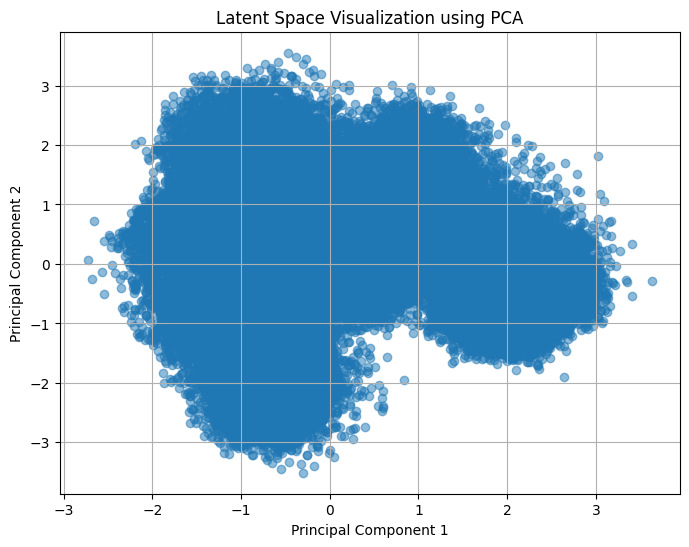

In [25]:
from sklearn.decomposition import PCA

# Function to encode data into the latent space
def encode_data(vae_model, data_loader):
    latent_space = []
    with torch.no_grad():
        for data, _ in data_loader:
            data = data.to(device)
            mu, _ = vae_model.encode(data.view(-1, 784))
            latent_space.append(mu.cpu().detach().numpy())
    return np.concatenate(latent_space, axis=0)

# Get latent representations of the data
latent_space_data = encode_data(model, train_loader)

# Apply PCA to the latent representations
pca = PCA(n_components=2)
latent_space_pca = pca.fit_transform(latent_space_data)

# Plot the latent space
plt.figure(figsize=(8, 6))
plt.scatter(latent_space_pca[:, 0], latent_space_pca[:, 1], alpha=0.5)
plt.title('Latent Space Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

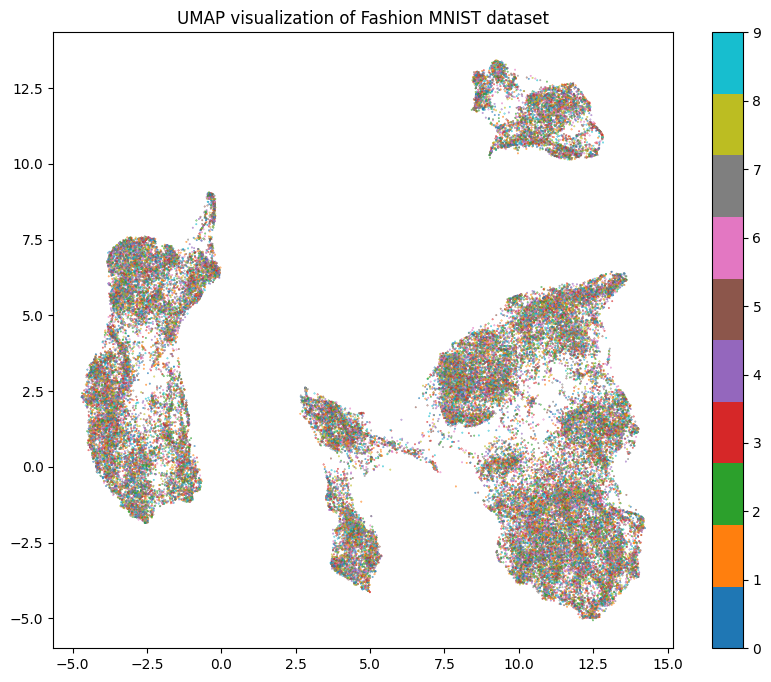

In [26]:
import umap

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP()
embedding = reducer.fit_transform(latent_space_data)

# Visualize the embedding
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=train_loader.dataset.targets, cmap='tab10', s=0.1)
plt.colorbar()
plt.title('UMAP visualization of Fashion MNIST dataset')
plt.show()

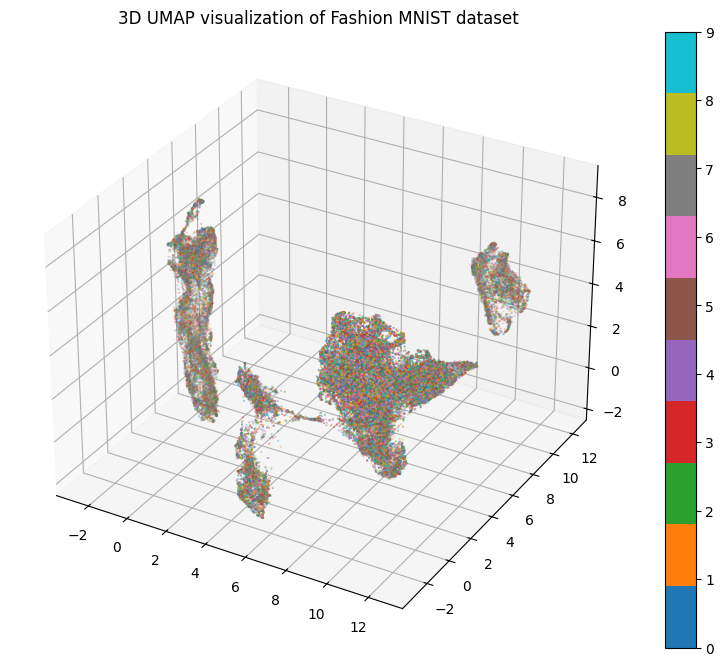

In [32]:
# Apply UMAP for dimensionality reduction in 3D
reducer_3d = umap.UMAP(n_components=3)
embedding_3d = reducer_3d.fit_transform(latent_space_data)

# Visualize the embedding in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=train_loader.dataset.targets, cmap='tab10', s=0.1)

# Color bar
plt.colorbar(scatter)

# Title
plt.title('3D UMAP visualization of Fashion MNIST dataset')

plt.show()

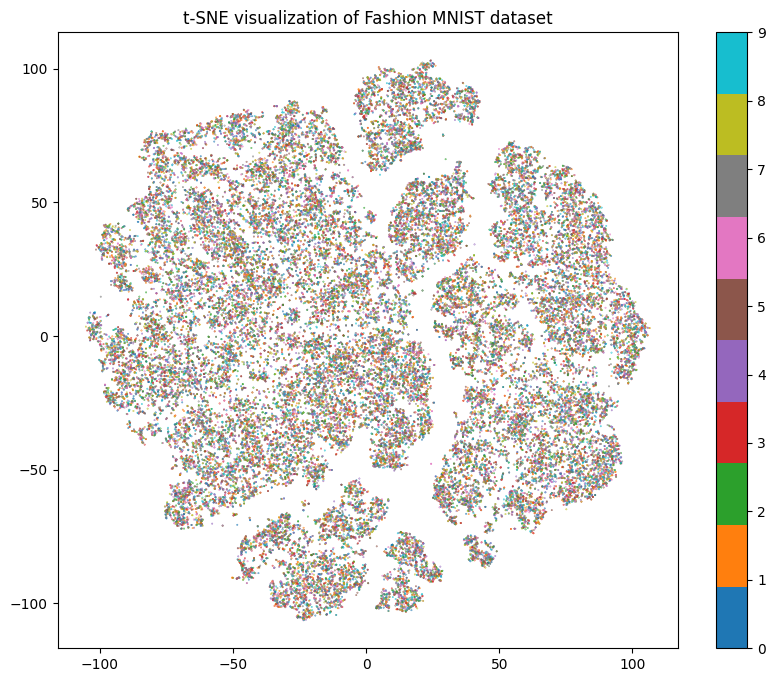

In [28]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedding_tsne = tsne.fit_transform(latent_space_data)

# Visualize the embedding using t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], c=train_loader.dataset.targets, cmap='tab10', s=0.1)
plt.colorbar()
plt.title('t-SNE visualization of Fashion MNIST dataset')
plt.show()

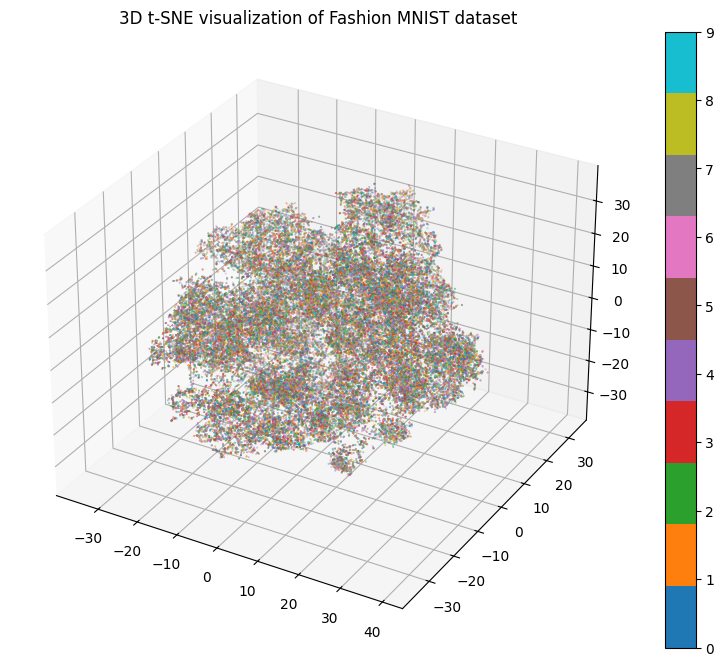

In [33]:
# Apply t-SNE for dimensionality reduction in 3D
tsne_3d = TSNE(n_components=3, random_state=42)
embedding_tsne_3d = tsne_3d.fit_transform(latent_space_data)

# Visualize the embedding in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(embedding_tsne_3d[:, 0], embedding_tsne_3d[:, 1], embedding_tsne_3d[:, 2], c=train_loader.dataset.targets, cmap='tab10', s=0.1)

# Color bar
plt.colorbar(scatter)

# Title
plt.title('3D t-SNE visualization of Fashion MNIST dataset')

plt.show()

# Task d) - Changes in the latent dimension size

Latent Size: 2, Duration: 122.40 seconds
Latent Size: 5, Duration: 124.34 seconds
Latent Size: 10, Duration: 120.40 seconds
Latent Size: 20, Duration: 122.01 seconds
Latent Size: 50, Duration: 127.67 seconds
Latent Size: 100, Duration: 133.73 seconds
Latent Size: 300, Duration: 157.25 seconds


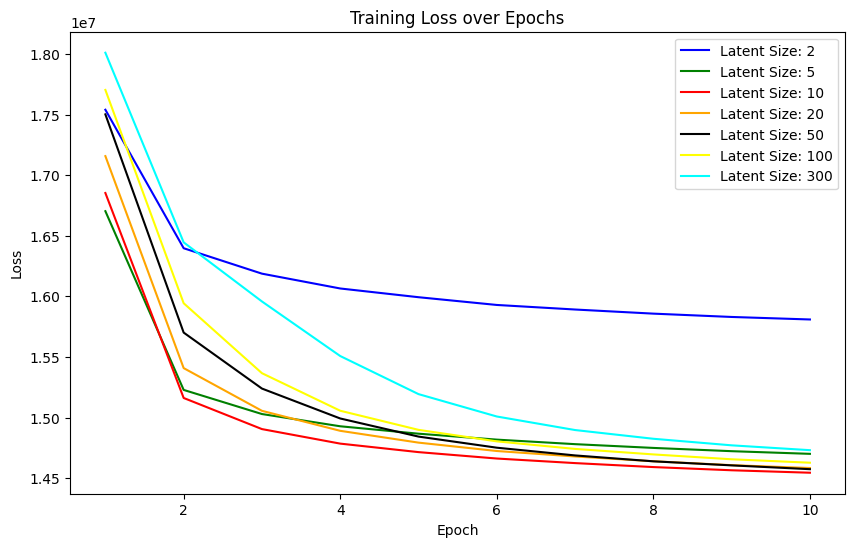

In [31]:
import time

def plot_for_latent_sizes(latent_sizes):
    colors = ['blue', 'green', 'red', 'orange', 'black', 'yellow', 'cyan']
    # Initialize model and optimizer for each latent size
    models = [VAE(input_size, hidden_size, latent_size).to(device) for latent_size in latent_sizes]
    optimizers = [optim.Adam(model.parameters(), lr=lr) for model in models]

    all_losses = []
    i = 0
    for model, optimizer in zip(models, optimizers):
        losses = []
        start_time = time.time()
        for epoch in range(1, epochs + 1):
            total_loss = train(model, train_loader, optimizer, epoch, False)
            losses.append(total_loss)
        all_losses.append(losses)
        duration = time.time() - start_time
        print('Latent Size: {}, Duration: {:.2f} seconds'.format(latent_sizes[i], duration))
        i = i + 1

    # Plot the loss curves for each latent size
    plt.figure(figsize=(10, 6))
    for i, latent_size in enumerate(latent_sizes):
        plt.plot(range(1, epochs + 1), all_losses[i], label='Latent Size: {}'.format(latent_size), color=colors[i])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()
    plt.show()

latent_sizes = [2, 5, 10, 20, 50, 100, 300]
plot_for_latent_sizes(latent_sizes)

